<a href="https://colab.research.google.com/github/Cec1989/CeciliaSagwati12020304/blob/Cecilia/CA1ProjectCeciliaSagwati12020304Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## LOADING DATASET
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/CA1ProjectDatasetCeciliaSagwati12020304.csv')
print('data shape = ',dataset.shape)

data shape =  (1372, 5)


In [2]:
## DATA EXPLORATION: CHECKING THE FIRST 6 RECORDS
dataset.head(6)

,Variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variance of Wavelet   1372 non-null   float64
 1   skewness of Wavelet   1372 non-null   float64
 2   curtosis of Wavelet   1372 non-null   float64
 3   entropy of image      1372 non-null   float64
 4   class                 1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
## SUMMARY STATISTICS OF THE DATA
dataset.describe()

,Variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
## DATA PRE_PROCESSING: CHECKING MISSING VALUES
dataset.isna().sum() 

Variance of Wavelet     0
skewness of Wavelet     0
curtosis of Wavelet     0
entropy of image        0
class                   0
dtype: int64

In [6]:
## PRINTING CLASSES AND NUMBER OF ELEMENTS IN EACH CLASS
import numpy as np
print('Distinct classes are',np.unique(dataset['class']))
print('NUmber of elements in class 0',(dataset['class']==0).sum())
print('NUmber of elements in class 1',(dataset['class']==1).sum())

Distinct classes are [0 1]
NUmber of elements in class 0 762
NUmber of elements in class 1 610


In [7]:
## FEATURE SELECTION: INPUT DATA
data=dataset.iloc[:,0:4]
data.head(5)

,Variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [8]:
## FEATURE SELECTION :TARGET DATA
target=dataset.iloc[:,4]
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [9]:
## SHAPE OF INPUT AND TARGET DATA
import numpy as np
print('Input data shape =',data.shape)
print('Target data shape =',target.shape)

Input data shape = (1372, 4)
Target data shape = (1372,)


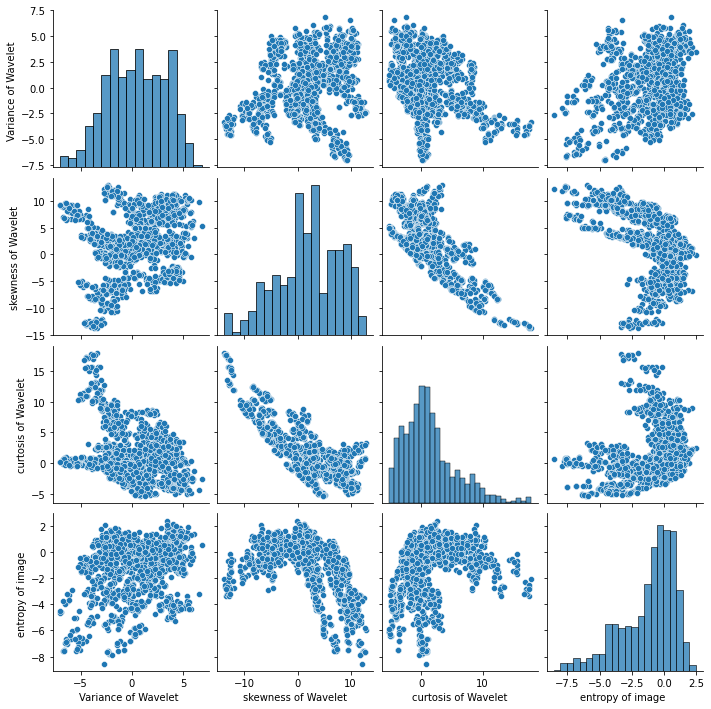

In [10]:
## ANALYSING RELATIONSHIP AMONG THE FEATURES
import seaborn as sns
sns.pairplot(data)

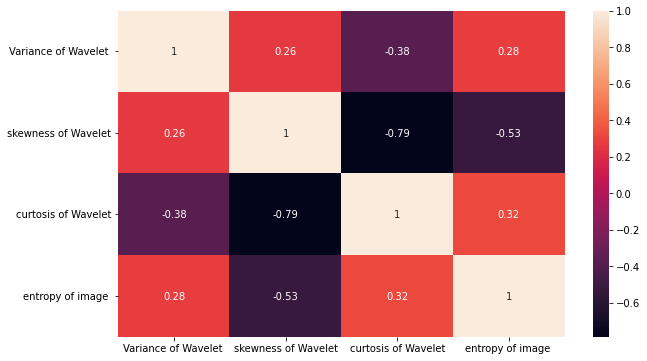

In [11]:
## ANALYSING CORRELATION OF THE FEATURES WITH HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
cor=data.corr()
sns.heatmap(cor,annot=True)

In [12]:
## FEATURE SCALING 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data)
data_std=sc.transform(data)

In [13]:
## SPLITING INPUT DATA AND TARGET DATA INTO TRAINING AND TESTING SET
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test=train_test_split(data_std,target,test_size=0.3,random_state=0)
print('Training datashape =',data_train.shape,'and Testing dataset =',data_test.shape)

Training datashape = (960, 4) and Testing dataset = (412, 4)


SVC Testing accuracy= 1.0
SVC Training accuracy= 1.0
[[232   0]
 [  0 180]]


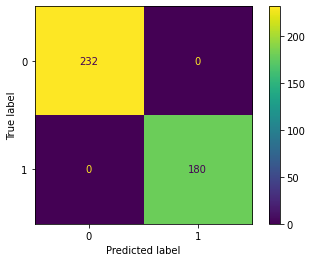

In [14]:
# SVC MODEL TRAINING, PREDICTION AND EVALUATION  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
svc=SVC()
svc.fit(data_train,target_train)
pred_testsvc=svc.predict(data_test)
pred_trainsvc=svc.predict(data_train)
print('SVC Testing accuracy=',accuracy_score(target_test,pred_testsvc))
print('SVC Training accuracy=',accuracy_score(target_train,pred_trainsvc))
print(confusion_matrix(target_test,pred_testsvc))
ConfusionMatrixDisplay.from_predictions(target_test,pred_testsvc)

Perceptron Testing accuracy= 0.9805825242718447
Perceptron Training accuracy= 0.9947916666666666
[[224   8]
 [  0 180]]


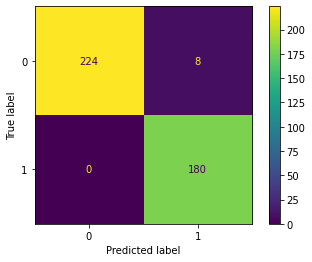

In [15]:
# PERCEPTRON MODEL TRAINING, PREDICTION AND EVALUATION  
from sklearn.linear_model import Perceptron
pptn=Perceptron()
pptn.fit(data_train,target_train)
pred_testpptn=pptn.predict(data_test)
pred_trainpptn=pptn.predict(data_train)
print('Perceptron Testing accuracy=',accuracy_score(target_test,pred_testpptn))
print('Perceptron Training accuracy=',accuracy_score(target_train,pred_trainpptn))
print(confusion_matrix(target_test,pred_testpptn))
ConfusionMatrixDisplay.from_predictions(target_test,pred_testpptn)

Logistic Regression Testing accuracy= 0.9830097087378641
Logistic Regression Training accuracy= 0.98125
[[225   7]
 [  0 180]]


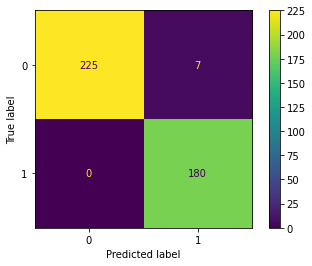

In [16]:
# LOGISTIC REGRESSION MODEL TRAINING, PREDICTION AND EVALUATION  
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(data_train,target_train)
pred_testLR=LR.predict(data_test)
pred_trainLR=LR.predict(data_train)
print('Logistic Regression Testing accuracy=',accuracy_score(target_test,pred_testLR))
print('Logistic Regression Training accuracy=',accuracy_score(target_train,pred_trainLR))
print(confusion_matrix(target_test,pred_testLR))
ConfusionMatrixDisplay.from_predictions(target_test,pred_testLR)

Decision Tree Testing accuracy= 0.9805825242718447
Decision Tree Training accuracy= 1.0
[[227   5]
 [  3 177]]


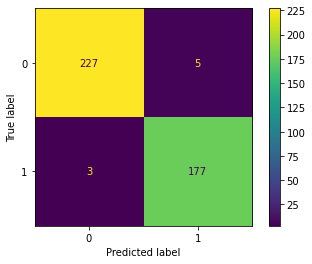

In [17]:
## DECISION TREE MODEL TRAINING, PREDICTION AND EVALUATION  
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(data_train,target_train)
pred_testDT=DT.predict(data_test)
pred_trainDT=DT.predict(data_train)
print('Decision Tree Testing accuracy=',accuracy_score(target_test,pred_testDT))
print('Decision Tree Training accuracy=',accuracy_score(target_train,pred_trainDT))
print(confusion_matrix(target_test,pred_testDT))
ConfusionMatrixDisplay.from_predictions(target_test,pred_testDT)

KNeighbors Testing accuracy= 0.9975728155339806
KNeighbors  Training accuracy= 0.9989583333333333
[[231   1]
 [  0 180]]


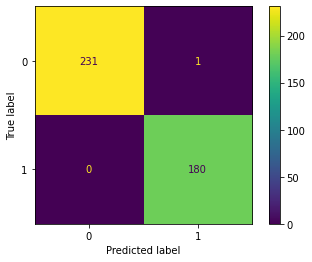

In [18]:
## KNEIGHBORS MODEL TRAINING, PREDICTION AND EVALUATION  
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(data_train,target_train)
pred_testKNN = KNN.predict(data_test)
pred_trainKNN = KNN.predict(data_train)
print('KNeighbors Testing accuracy=',accuracy_score(target_test,pred_testKNN))
print('KNeighbors  Training accuracy=',accuracy_score(target_train,pred_trainKNN))
print(confusion_matrix(target_test,pred_testKNN))
ConfusionMatrixDisplay.from_predictions(target_test,pred_testKNN)

In [19]:
##  MODEL EVALUATION SUMMARY: ACCURACY,PRECISION AND RECALL
from sklearn.metrics import accuracy_score, precision_score, recall_score
models={}
models['Support Vector Machines'] = SVC()
models['Perceptron'] = Perceptron()
models['Logistic Regression'] = LogisticRegression()
models['Decision Tree'] = DecisionTreeClassifier()
models['K-Nearest Neighbor'] =KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy, precision, recall = {}, {}, {}
for key in models.keys(): 
    # Fit the classifier model
    models[key].fit(data_train, target_train)
    # Testing Prediction 
    predictions = models[key].predict(data_test)
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, target_test)
    precision[key] = precision_score(predictions, target_test)
    recall[key] = recall_score(predictions, target_test)

In [20]:
## CREATING A DATAFRAME OF MODEL EVALUATION SUMMARY
df_model = pd.DataFrame(index=models.keys(), columns=['Testing Accuracy', 'Testing Precision', 'Testing Recall'])
df_model['Testing Accuracy'] = accuracy.values()
df_model['Testing Precision'] = precision.values()
df_model['Testing Recall'] = recall.values()
df_model

,Testing Accuracy,Testing Precision,Testing Recall
Support Vector Machines,1.000000,1.000000,1.000000
Perceptron,0.980583,1.000000,0.957447
Logistic Regression,0.983010,1.000000,0.962567
Decision Tree,0.978155,0.983333,0.967213
K-Nearest Neighbor,0.997573,1.000000,0.994475


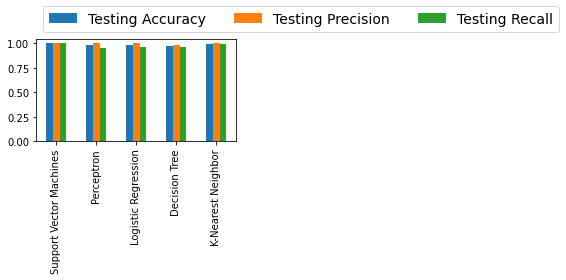

In [21]:
## SUMMARY OF MODEL EVALUATION
fig  = df_model.plot.bar(rot=90)
fig.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

In [22]:
### PERFORMANCE OF MODEL DURING TRAINING
accuracy1, precision1, recall1 = {}, {}, {}
for key in models.keys(): 
    # Fit the classifier model
    models[key].fit(data_train, target_train)
    # Training Prediction 
    predictions1 = models[key].predict(data_train)
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy1[key] = accuracy_score(predictions1, target_train)
    precision1[key] = precision_score(predictions1, target_train)
    recall1[key] = recall_score(predictions1, target_train)

In [23]:
## DATAFRAME OF MODEL PERFORMANCE DURING TRAINING
import pandas as pd
df_model1 = pd.DataFrame(index=models.keys(), columns=['Training Accuracy', 'Training Precision', 'Training Recall'])
df_model1['Training Accuracy'] = accuracy1.values()
df_model1['Training Precision'] = precision1.values()
df_model1['Training Recall'] = recall1.values()
df_model1

,Training Accuracy,Training Precision,Training Recall
Support Vector Machines,1.000000,1.000000,1.000000
Perceptron,0.994792,1.000000,0.988506
Logistic Regression,0.981250,0.995349,0.963964
Decision Tree,1.000000,1.000000,1.000000
K-Nearest Neighbor,0.998958,1.000000,0.997680


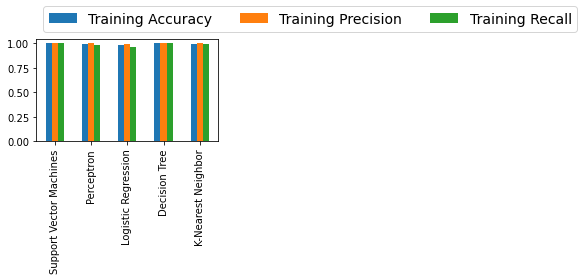

In [24]:
## ## SUMMARY OF MODEL ACCURACY DURING TRAINING
fig1  = df_model1.plot.bar(rot=90)
fig1.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()